## To Explore Unsupervised Learning

**Importing Relevant Libraries**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

**Importing the Dataset**

In [2]:
df=pd.read_csv('Iris.csv',)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


We first begin by ditermining the Optimal number of clusters using sepal data in the dataset

In [3]:
df1=df.drop(['Id','PetalLengthCm','PetalWidthCm','Species'],axis=1)
df1.head()

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


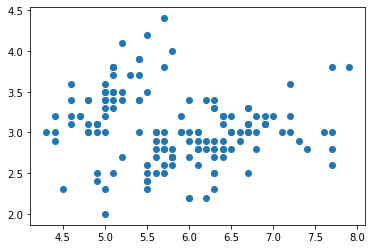

In [4]:
plt.scatter(df1['SepalLengthCm'],df1['SepalWidthCm'])

We make an assumption that the number of clusters are 3 but there is an apt method to ditermine this optimal number of clusters

In [5]:
from sklearn.cluster import KMeans

In [6]:
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
y_pred=km.fit_predict(df1)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [8]:
df1['Cluster']=y_pred
df1.head()

,SepalLengthCm,SepalWidthCm,Cluster
0,5.1,3.5,2
1,4.9,3.0,2
2,4.7,3.2,2
3,4.6,3.1,2
4,5.0,3.6,2


Hence we were able to ditermine that for a given input data, we could ditermine the output data(optimal clusters)

**Data Visualization**

Text(0, 0.5, 'SepalWidthCm')

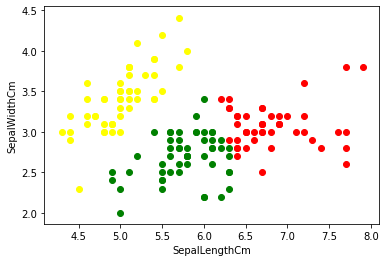

In [9]:
d1=df1[df1.Cluster==0]
d2=df1[df1.Cluster==1]
d3=df1[df1.Cluster==2]
plt.scatter(d1['SepalLengthCm'],d1['SepalWidthCm'],color='green')
plt.scatter(d2['SepalLengthCm'],d2['SepalWidthCm'],color='red')
plt.scatter(d3['SepalLengthCm'],d3['SepalWidthCm'],color='yellow')

plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')

In [10]:
centroid=km.cluster_centers_
centroid

array([[5.77358491, 2.69245283],
       [6.81276596, 3.07446809],
       [5.006     , 3.418     ]])

Text(0, 0.5, 'SepalWidthCm')

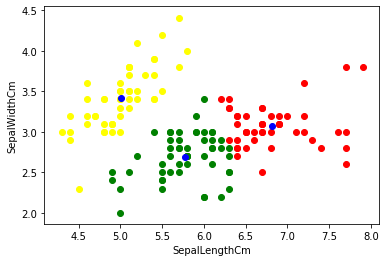

In [11]:
d1=df1[df1.Cluster==0]
d2=df1[df1.Cluster==1]
d3=df1[df1.Cluster==2]
plt.scatter(d1['SepalLengthCm'],d1['SepalWidthCm'],color='green')
plt.scatter(d2['SepalLengthCm'],d2['SepalWidthCm'],color='red')
plt.scatter(d3['SepalLengthCm'],d3['SepalWidthCm'],color='yellow')
plt.scatter(centroid[:,0],centroid[:,1],color='blue')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')

In [12]:
k_range=range(1,10)
wcss=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df1)
    wcss.append(km.inertia_)
    
wcss

[233.12093333333337,
 92.5692,
 37.12370212765957,
 29.729882481926886,
 22.575238095238095,
 17.483779788838614,
 15.436181647092138,
 13.345795993064495,
 12.015478658768133]

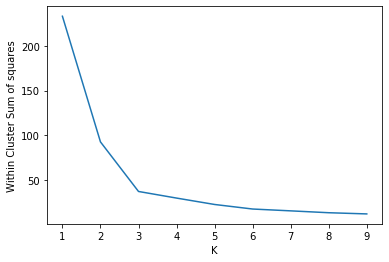

In [13]:
plt.xlabel('K')
plt.ylabel('Within Cluster Sum of squares')
plt.plot(k_range,wcss)

Here, following **the elbow method** we observe that the elbow is obtained at n=3 and hence we shall conclude that the optimal no of clusters are 3 

Now, we consider the entire data all together and check which classes does it belong to, ie, run the actual **Classification 
Problem.**

In [14]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

Here, it is evident that there are exactly **3** classes of species given in the current dataset

In [15]:
df=df.drop(['Id','Species'],axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Now, We try to ditermine the optimal number of clusters, knowing that the output must be **3**, as there are **3** classes.

In [16]:
k_range=range(1,10)
wcss=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df)
    wcss.append(km.inertia_)
    
wcss

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.53558205128205,
 38.93873974358974,
 34.42972435897436,
 29.955568877177576,
 28.041672719093775]

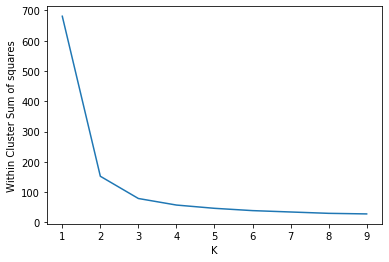

In [17]:
plt.xlabel('K')
plt.ylabel('Within Cluster Sum of squares')
plt.plot(k_range,wcss)

In [18]:
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
y_pred1=km.fit_predict(df)
y_pred1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [20]:
df['Predicted']=y_pred1
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predicted
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


In [21]:
centroid=km.cluster_centers_
centroid

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ]])

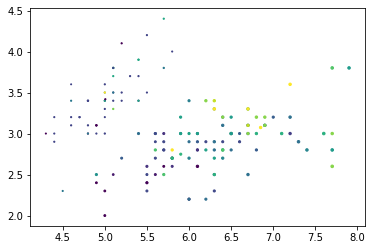

In [22]:
d4=df[df.Predicted==0]
d5=df[df.Predicted==1]
d6=df[df.Predicted==2]
plt.scatter(d4['SepalLengthCm'],d4['SepalWidthCm'],d4['PetalLengthCm'],d4['PetalWidthCm'])
plt.scatter(d5['SepalLengthCm'],d5['SepalWidthCm'],d5['PetalLengthCm'],d5['PetalWidthCm'])
plt.scatter(d6['SepalLengthCm'],d6['SepalWidthCm'],d6['PetalLengthCm'],d6['PetalWidthCm'])
plt.scatter(centroid[:,0],centroid[:,1],centroid[:,2],centroid[:,3])

In [23]:
new_data=pd.read_csv('Iris.csv')
new_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
new_data['Predicted']=y_pred1
new_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted
0,1,5.1,3.5,1.4,0.2,Iris-setosa,2
1,2,4.9,3.0,1.4,0.2,Iris-setosa,2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5,5.0,3.6,1.4,0.2,Iris-setosa,2


In [25]:
new_data['Species']=new_data['Species'].map({'Iris-versicolor':0,'Iris-setosa':1,'Iris-virginica':2})

In [26]:
new_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted
0,1,5.1,3.5,1.4,0.2,1,2
1,2,4.9,3.0,1.4,0.2,1,2
2,3,4.7,3.2,1.3,0.2,1,2
3,4,4.6,3.1,1.5,0.2,1,2
4,5,5.0,3.6,1.4,0.2,1,2
5,6,5.4,3.9,1.7,0.4,1,2
6,7,4.6,3.4,1.4,0.3,1,2
7,8,5.0,3.4,1.5,0.2,1,2
8,9,4.4,2.9,1.4,0.2,1,2
9,10,4.9,3.1,1.5,0.1,1,2


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(new_data['Species'],y_pred1)

array([[48,  2,  0],
       [ 0,  0, 50],
       [14, 36,  0]], dtype=int64)